In [5]:
#run below code twice
from line_profiler import LineProfiler
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import plotnine as gg
import torch
# from acme.utils.loggers.terminal import TerminalLogger
import dataclasses
import chex
import haiku as hk
import jax
import jax.numpy as jnp
import optax
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import pipeline_l2_loss
import seaborn as sns
from dataloader import TabularDataset
from l2_loss import *

training data count (251, 2)


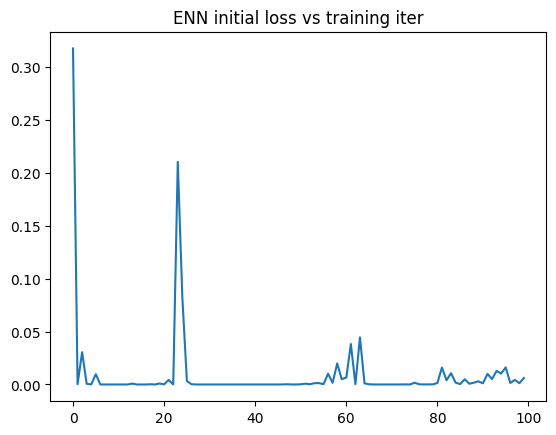

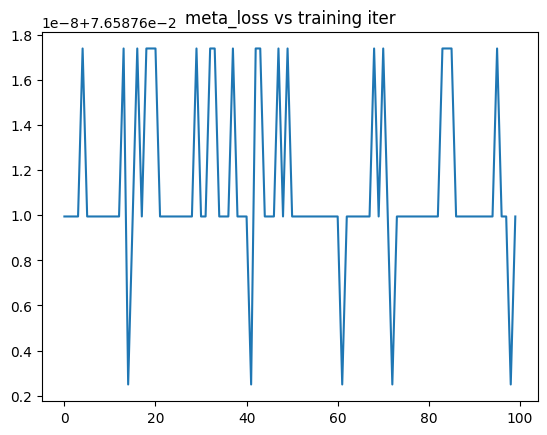

training epoch ends in  0.71 minutes.


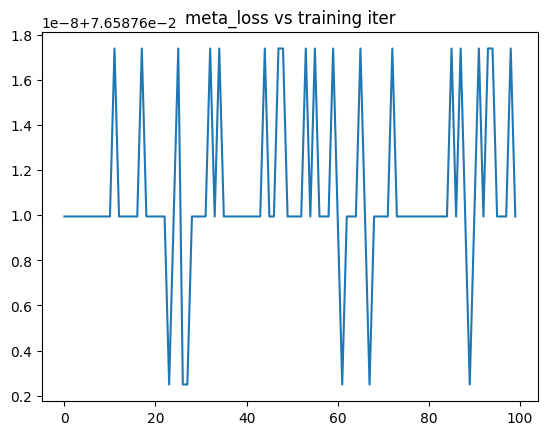

training epoch ends in  0.7 minutes.


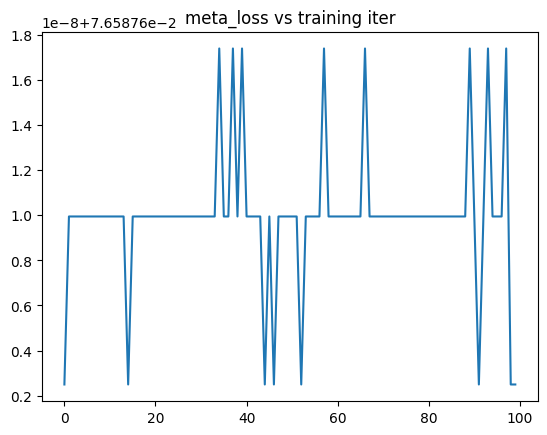

training epoch ends in  0.7 minutes.


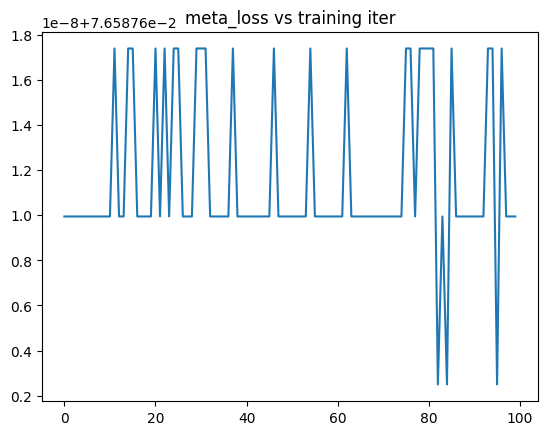

training epoch ends in  0.7 minutes.


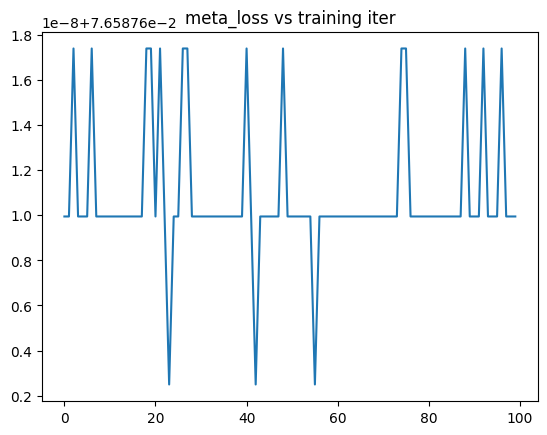

training epoch ends in  0.7 minutes.
test starts
test_meta_loss: tensor(0.0766, grad_fn=<MeanBackward0>)


In [2]:
#data generated from https://github.com/dakshmittal30/Adaptive_sampling/blob/49060b32a7c95ab5f8057ff593629d64ea411c14/src/notebooks/Dataset_generator.ipynb
#predictor (a logistic regression) generated from https://github.com/dakshmittal30/Adaptive_sampling/blob/49060b32a7c95ab5f8057ff593629d64ea411c14/src/notebooks/Predictor.ipynb 
#biased data from https://github.com/dakshmittal30/Adaptive_sampling/blob/7cf3996c786ce33db90fcb7aef8584054169557c/src/notebooks/Selection_bias.ipynb 
directory = '/shared/share_mala/yuanzhe/adaptive_sampling/pipeline_datasets/'
train_csv_name = directory +'/biased_new/input_dim_1_train_init_data_mean_0.0ln_1.0sig_0.1no.2000_random_prop_score_selected_2_16.0__.csv'
test_csv_name = directory + 'input_dim_1_test_final_data_mean_0.0ln_1.0sig_0.1no.2000.csv'
pool_csv_name = directory + 'input_dim_1_pool_data_mean_0.0ln_1.0sig_0.1no.2000.csv'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

'''
data is from https://github.com/dakshmittal30/Adaptive_sampling/blob/b50b04706c8824d401d5cdb1c4dea9287cb9a2cb/src/notebooks/check_gradient/Selection_bias-regression.ipynb  
l2_loss train 0.0307949036359787
l2_loss test 0.07647431641817093
l2_loss pool 0.08316905051469803
'''

df_train = pd.read_csv(train_csv_name)
print('training data count',df_train.shape)

Z_dim = 8

dataset_cfg = pipeline_l2_loss.DatasetConfig(train_csv_name, test_csv_name, pool_csv_name, "EVENT_LABEL")
model_cfg = pipeline_l2_loss.ModelConfig(batch_size_train = 251, batch_size_test = 500, batch_size_query = 100, temp_k_subset = 0.1, hidden_sizes_weight_NN = [50,50], meta_opt_lr = 0.01, n_classes = 2, n_epoch = 5, init_train_lr = 0.05, init_train_weight_decay = 0.01, n_train_init = 100, meta_opt_weight_decay = 0.01)
train_cfg = pipeline_l2_loss.TrainConfig(n_train_iter = 100, n_ENN_iter = 15, ENN_opt_lr = 0.01, temp_var_recall = 0.4, z_dim = Z_dim, N_iter = 100, ENN_opt_weight_decay = 0.01) #temp_var_recall is the new variable added here
enn_cfg = pipeline_l2_loss.ENNConfig(basenet_hidden_sizes = [50,50],  exposed_layers = [False, True], z_dim = Z_dim, learnable_epinet_hiddens = [15,15], hidden_sizes_prior = [5,5], seed_base = 2, seed_learnable_epinet = 1, seed_prior_epinet = 0, alpha = 1.0)
 

model_predictor = torch.jit.load(directory + 'predictor_0214_regression.pt')
model_predictor.eval()

dataset_config = dataset_cfg
dataset_test = TabularDataset(device, csv_file=dataset_config.csv_file_test, y_column=dataset_config.y_column)

# Example usage
pipeline_l2_loss.experiment(dataset_cfg, model_cfg, train_cfg, enn_cfg, model_predictor, device = device, if_print = 0)

In [3]:
#%load_ext line_profiler
#profiling code - check which part
#%reload_ext line_profiler

#%lprun -f experiment experiment(dataset_cfg, model_cfg, train_cfg, enn_cfg, model_predictor, if_print = 1)